<a href="https://colab.research.google.com/github/Park-New-project/TIL/blob/main/%5BAI%5D_221013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 23시에 가장 많이 타고 내리는 역과 사람 수는?

import csv
import matplotlib.pyplot as plt

uri = "/content/gdrive/MyDrive/Colab/subwaytime.csv"

fp = open(uri, encoding="cp949")
data = csv.reader(fp)

max_data=0 # 최대 인원수
max_st=''
t=23
next(data)
next(data)

for row in data:
  # str > int
  row[4:] = map(int,row[4:])
  m= row[4+(t-4)*2] # 승차시간과 인덱스의 관계 [4,5,6, ...] => [4,6,8, ...]
  
  # 11시의 최대 인원수와 역 찾기
  if m > max_data:
    max_data = m
    max_st = row[3] +" "+row[1]

fp.close()
print("23시 가장 많이 타고 내리는 곳 :",max_st, ":",max_data)


23시 가장 많이 타고 내리는 곳 : 강남 2호선 : 145504


In [ ]:
# X시에 가장 많이 타고 내리는 역과 사람 수는?

import csv
import matplotlib.pyplot as plt

uri = "/content/gdrive/MyDrive/Colab/subwaytime.csv"

fp = open(uri, encoding="cp949")
data = csv.reader(fp)

max_data=0 # 최대 인원수
max_st=''
t=input("시간을 입력 : ")
t=int(t)
next(data)
next(data)

for row in data:
  # str > int
  row[4:] = map(int,row[4:])
  m= row[4+(t-4)*2] # 승차시간과 인덱스의 관계 [4,5,6, ...] => [4,6,8, ...]
  
  # X시 최대 인원수와 역 찾기
  if m > max_data:
    max_data = m
    max_st = row[3] +" "+row[1]

fp.close()
print(t,"시 가장 많이 타고 내리는 곳 :",max_st, ":",max_data)


시간을 입력 : 19
19 시 가장 많이 타고 내리는 곳 : 강남 2호선 : 292521


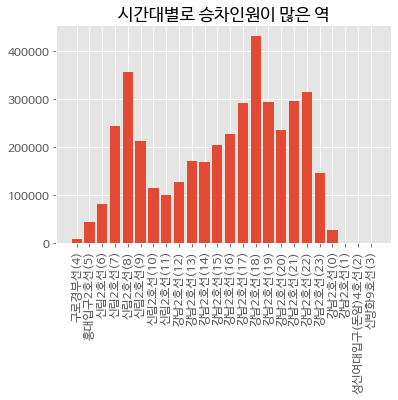

In [ ]:
# 시간대별로 승차인원이 많은 역과 사람 수는?
import csv
import matplotlib.pyplot as plt

uri = "/content/gdrive/MyDrive/Colab/subwaytime.csv"

fp = open(uri, encoding="cp949")
data = csv.reader(fp)

max_data=[0]*24 # 브로드캐스트
max_st=['']*24
next(data)
next(data)

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):
    m = row[j*2+4] #  j[0, ... ,23] -> 인덱스 m[0, ...,50] 관계
    if m > max_data[j]:
      max_data[j]=m
      max_st[j]= row[3] + row[1]+"("+str((j+4)%24)+")"

fp.close()

plt.style.use("ggplot")
plt.rc('font',family='NanumBarunGothic', size=12)
plt.title("시간대별로 승차인원이 많은 역")
plt.xticks(range(24),max_st,rotation=90)
plt.bar(range(24), max_data)
plt.show()

['부평경인선(4)', '강남2호선(5)', '강남2호선(6)', '강남2호선(7)', '가산디지털단지7호선(8)', '강남2호선(9)', '강남2호선(10)', '강남2호선(11)', '강남2호선(12)', '강남2호선(13)', '홍대입구2호선(14)', '홍대입구2호선(15)', '홍대입구2호선(16)', '홍대입구2호선(17)', '강남2호선(18)', '신림2호선(19)', '신림2호선(20)', '신림2호선(21)', '신림2호선(22)', '신림2호선(23)', '신림2호선(0)', '서울대입구(관악구청)2호선(1)', '성신여대입구(돈암)4호선(2)', '']


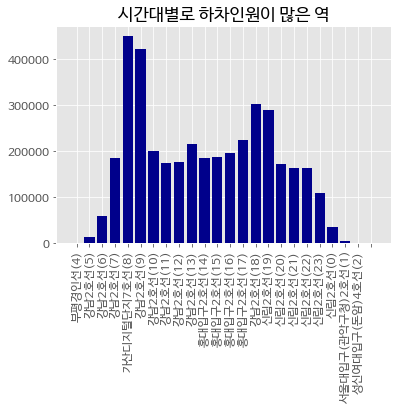

In [ ]:
# 시간대별로 하차인원이 많은 역과 사람 수는?

import csv
import matplotlib.pyplot as plt

fp=open(uri, encoding="cp949")
data = csv.reader(fp)

max_data=[0]*24
max_st=['']*24
next(data)
next(data)

for row in data:
  row[4:] = map(int, row[4:])
  for j in range(24):      
    m = row[j*2+5]
    if m > max_data[j]:
      max_data[j] = m
      max_st[j] = row[3] + row[1] +"("+str((j+4)%24)+")"

fp.close()
print(max_st)

plt.style.use("ggplot")
plt.rc('font',family='NanumBarunGothic', size=12)
plt.title("시간대별로 하차인원이 많은 역")
plt.xticks(range(24), max_st, rotation=90)
plt.bar(range(24), max_data, color="darkblue")
plt.show()

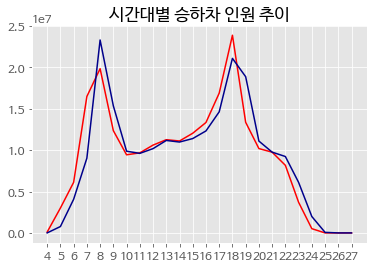

In [ ]:
# 모든 지하철 역에서 시간대별 승하차 인원을 모두 더하면?
# 시간대별로 하차인원이 많은 역과 사람 수는?

import csv
import matplotlib.pyplot as plt

fp=open(uri, encoding="cp949")
data = csv.reader(fp)

sum_in = [0]*24
sum_out=[0]*24
next(data)
next(data)

for row in data:
  row[4:] = map(int, row[4:])
  for i in range(24):      
    sum_in[i] += row[4+i*2]
    sum_out[i] += row[5+i*2]

fp.close()

plt.style.use("ggplot")
plt.rc('font',family='NanumBarunGothic', size=12)
plt.title("시간대별 승하차 인원 추이")
plt.xticks(range(24), range(4,28))
plt.plot(range(24), sum_in, color="red",label="승차")
plt.plot(range(24), sum_out, color="darkblue",label="하차")
plt.legend
plt.show()

# 머신러닝을 이용한 모델링 기법
1. 데이터 준비
2. 모델의 표현방법 (알고리즘) 선택
3. 모델 성능 평가
